### Introduction to Time Series Example 2.4
Here we illustrate a few important ideas and concepts related to multivariate time series data. The quarterly supply of electricity (millions of kWh) in Australia will be considered and compared to the already used data set on the quarterly beer production. First, we load the electricity data from file and create a time series out of it. 

In [1]:
import numpy as np
import pandas as pd

# Load data
AusBeer = pd.read_csv('./data/AustralianBeer.csv', sep = ";", header = 0)
AusEl = pd.read_csv('./data/AustralianElectricity.csv', sep = ";")

# Create pandas DateTimeIndex
dtindexB = pd.DatetimeIndex(data=pd.to_datetime(AusBeer["Quarter"]), 
                            freq='infer')
dtindexE = pd.DatetimeIndex(data=pd.to_datetime(AusEl["Quarter"]), 
                            freq='infer')

# Set as Index
AusBeer.set_index(dtindexB, inplace=True)
AusEl.set_index(dtindexE, inplace=True)
AusBeer.drop("Quarter", axis=1, inplace=True)
AusEl.drop("Quarter", axis=1, inplace=True)

# Create new DataFrame combining both
Aus = pd.merge(AusBeer, AusEl, on="Quarter")

print(Aus.head(3))

            megalitres  kilowatt
Quarter                         
1956-01-01       284.4      3923
1956-04-01       212.8      4436
1956-07-01       226.9      4806


Now we plot the series:

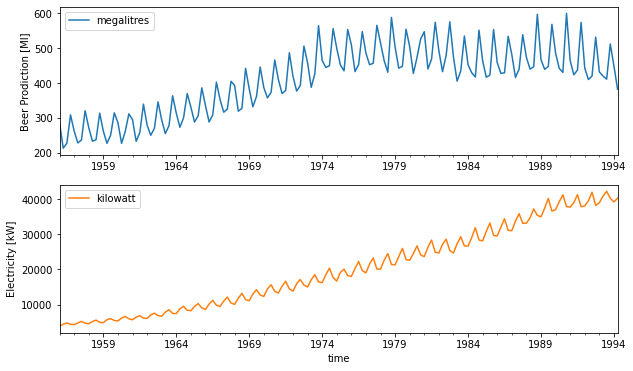

In [2]:
import matplotlib.pyplot as plt

# Plot
fig, ax = plt.subplots(figsize=(10, 6), nrows=2)
# All data
Aus.plot(ax=ax[:],  subplots=True)

ax[0].set_xlabel("")
ax[1].set_xlabel("time")
ax[0].set_ylabel("Beer Prodiction [Ml]")
ax[1].set_ylabel("Electricity [kW]")

plt.show()

The plots show increasing trends in production for both goods, partly due to the rising population in Australia from about 10 million to about 18 million over the same period. But notice that electricity production has risen by a factor of 7 during which the population has not quite doubled.

Note, that the two time series are correlated (with a correlation coefficient of $0.7$), however there is of course no causal relation of the two series (A series of similar and very funny spurious correlations can be found on http://www.tylervigen.com/spurious-correlations). They are *confounded* by seasonal effects: It is not plausible that higher numbers of air passengers in the United States cause, or are caused by, higher electricity production in  Australia. Here, summer in the northern hemisphere implies an increase in airpassagenger bookings where at the same time the winter in the southern hemisphere results in a higher demand in electricity. A further explanation for the correlation is that the increasing prosperity and technological development in both countries over this period accounts for the increasing trends.